# Урок 9. Ансамбли на практике
Ваша задача — реализовать алгоритм случайного леса для задачи классификации и применить его к набору данных.

Шаги выполнения задания:

1. Импортируйте необходимые библиотеки: numpy, pandas, sklearn.

2. Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

3. Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

4. Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

5. Обучите вашу модель случайного леса на обучающей выборке.

6. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

7. Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

## 1. Импортируйте необходимые библиотеки: numpy, pandas, sklearn.


In [1]:
import numpy as np                # Библиотека для работы с массивами и матрицами
import pandas as pd               # Библиотека для работы с данными в формате таблиц (DataFrame)
import matplotlib.pyplot as plt    # Библиотека для визуализации данных
import seaborn as sns             # Библиотека для более красивой визуализации данных
from sklearn.datasets import load_iris  # Загрузка набора данных Iris
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.preprocessing import StandardScaler  # Для масштабирования данных
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Метрики для оценки модели
from sklearn.ensemble import RandomForestClassifier  # Алгоритм случайного леса



## 2. Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

В этом шаге мы загружаем набор данных Iris, который содержит информацию о различных видах ирисов. Набор данных состоит из 150 образцов, каждый из которых имеет 4 признака (длину и ширину чашелистика и лепестка) и целевую переменную (вид ириса).

In [2]:
# Загрузка данных
iris = load_iris()  # Загружаем набор данных Iris
X = iris.data       # Признаки (4 признака)
y = iris.target     # Целевая переменная (3 класса)

# Преобразование в DataFrame для удобства анализа
data = pd.DataFrame(data=X, columns=iris.feature_names)  # Создаем DataFrame из признаков
data['target'] = y  # Добавляем целевую переменную в DataFrame


## 3. Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

На этом этапе мы разделим набор данных на обучающую и тестовую выборки. Это необходимо для того, чтобы мы могли обучить модель на одной части данных и протестировать ее на другой, не виденной ранее.

In [3]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# test_size=0.2 означает, что 20% данных будет отведено под тестовую выборку

# Масштабирование данных
scaler = StandardScaler()  # Создаем экземпляр StandardScaler
X_train = scaler.fit_transform(X_train)  # Масштабируем обучающую выборку
X_test = scaler.transform(X_test)        # Масштабируем тестовую выборку (используя параметры обучающей выборки)


Масштабирование данных помогает улучшить производительность модели, особенно если признаки имеют разные единицы измерения или диапазоны значений.

Разделение данных на обучающую и тестовую выборки критично для оценки производительности модели.

## 4. Исследовательский анализ данных (EDA)
Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

 Исследовательский анализ данных помогает выявить паттерны, аномалии и взаимосвязи между признаками. Визуализация классов и матрицы рассеяния предоставляет ценную информацию о структуре данных, что важно для понимания задачи классификации.

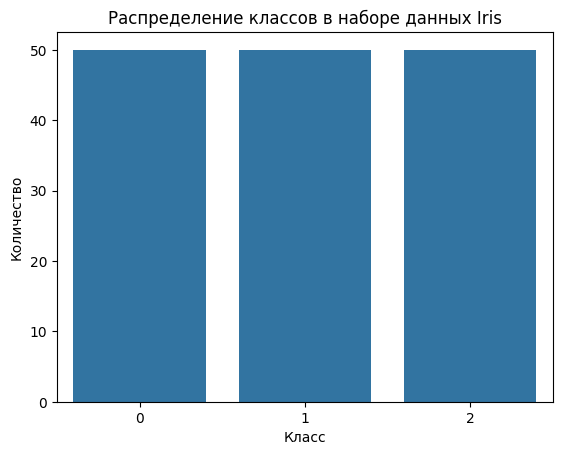

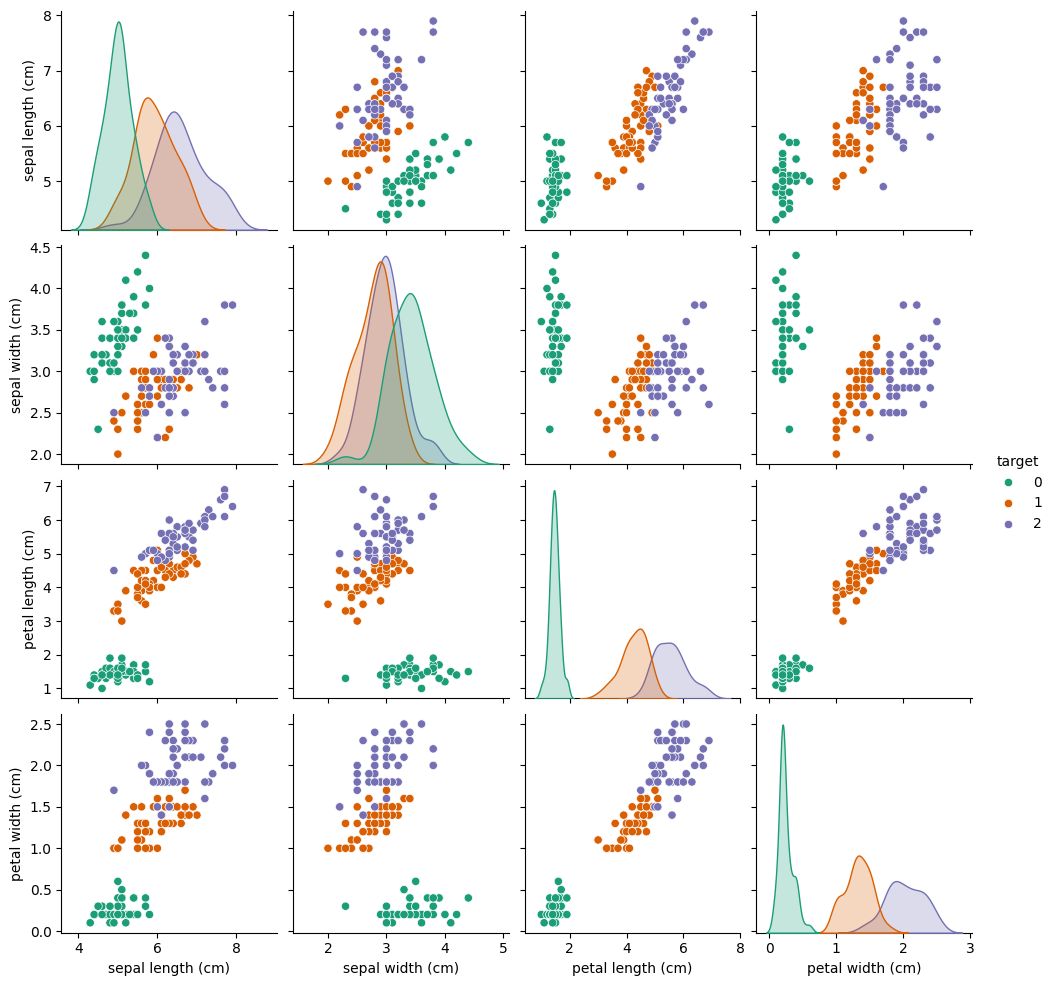

In [5]:
# Визуализация распределения классов
sns.countplot(x='target', data=data)  # Столбчатая диаграмма для отображения количества образцов каждого класса
plt.title('Распределение классов в наборе данных Iris')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# Визуализация матрицы рассеяния
sns.pairplot(data, hue='target', palette='Dark2')  # Матрица рассеяния для анализа взаимосвязей между признаками
plt.show()

## 5. Обучите вашу модель случайного леса на обучающей выборке.

Теперь мы можем обучить модель случайного леса. Случайный лес — это ансамблевый метод, который использует множество деревьев решений для улучшения предсказаний.

In [6]:
# Обучение модели случайного леса
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)  # Создаем экземпляр классификатора
rf.fit(X_train, y_train)  # Обучаем модель на обучающей выборке


RandomForestClassifier(max_depth=3, random_state=42)

n_estimators: количество деревьев в лесу.    
max_depth: максимальная глубина каждого дерева. Ограничение глубины помогает избежать переобучения.

Обучение модели случайного леса позволяет использовать мощный алгоритм, который может эффективно справляться с задачами классификации. Настройка гиперпараметров, таких как количество деревьев и максимальная глубина, позволяет контролировать сложность модели и предотвращать переобучение.

## 6. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

После обучения модели мы можем оценить ее производительность на тестовой выборке, используя различные метрики.

In [7]:

# Предсказание на тестовой выборке
y_pred = rf.predict(X_test)  # Получаем предсказания для тестовой выборки

# Оценка метрик
accuracy = accuracy_score(y_test, y_pred)  # Точность
precision = precision_score(y_test, y_pred, average='weighted')  # Прецизионность
recall = recall_score(y_test, y_pred, average='weighted')  # Полнота
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-мера

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Оценка производительности модели с использованием различных метрик позволяет получить полное представление о ее эффективности. Метрики, такие как точность, прецизионность, полнота и F1-мера, помогают понять, насколько хорошо модель справляется с задачей классификации.

## 7. Матрица ошибок

Матрица ошибок предоставляет визуальное представление о том, как модель классифицирует образцы. Она показывает количество правильных и неправильных предсказаний, что помогает выявить области, где модель может быть улучшена.

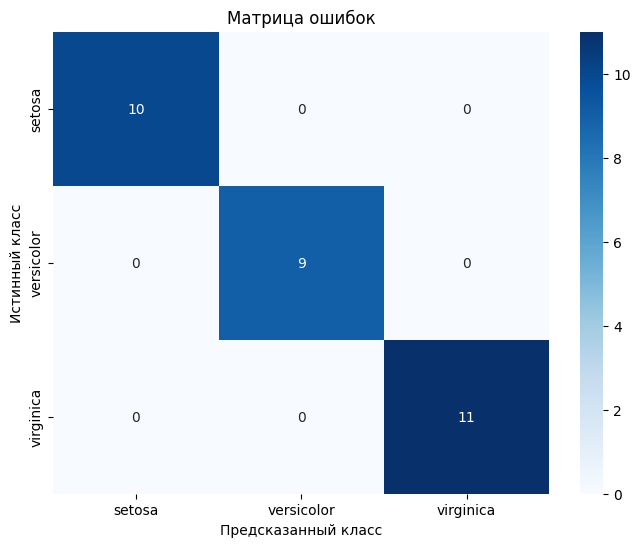

In [8]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)  # Создаем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()


## 8: Визуализация важности признаков    
Важность признаков показывает, какие признаки оказывают наибольшее влияние на предсказания модели.

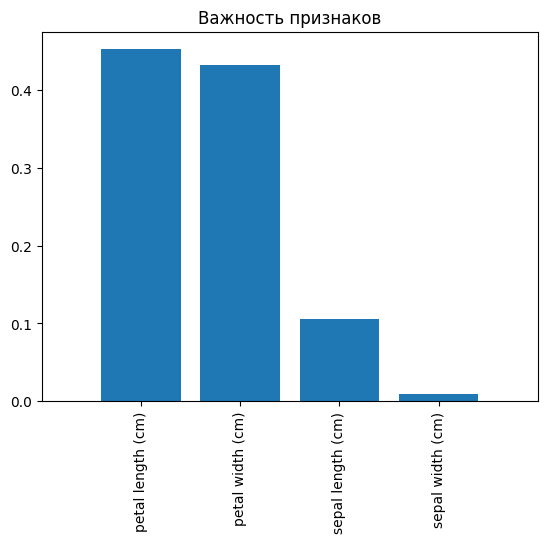

In [9]:
# Визуализация важности признаков
importances = rf.feature_importances_  # Получаем важность признаков
indices = np.argsort(importances)[::-1]  # Сортируем признаки по важности

plt.figure()
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Визуализация важности признаков позволяет понять, какие признаки наиболее влияют на предсказания модели. Это может быть полезно для дальнейшего анализа данных и выбора наиболее значимых признаков для улучшения модели.

## 9: Оптимизация гиперпараметров
 Оптимизация гиперпараметров позволяет улучшить производительность модели, подбирая наилучшие значения для различных параметров. Это важный шаг для достижения наилучших результатов в задачах машинного обучения.

In [10]:
from sklearn.model_selection import GridSearchCV

# Определение параметров для поиска
param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 3, 5, 10],   # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10]  # Минимальное количество образцов для разделения узла
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=3)  # Кросс-валидация с 3 фолдами
grid_search.fit(X_train, y_train)  # Обучаем модель с оптимизированными гиперпараметрами

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


## 10: Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

Сравнение результатов с реализацией scikit-learn позволяет оценить, насколько хорошо работает оптимизированная модель. Это помогает убедиться, что оптимизация гиперпараметров действительно приводит к улучшению производительности.

In [11]:
# Обучение модели из scikit-learn
best_rf = grid_search.best_estimator_  # Получаем модель с лучшими параметрами
best_rf.fit(X_train, y_train)  # Обучаем модель на обучающей выборке

# Предсказание и оценка
sklearn_y_pred = best_rf.predict(X_test)  # Получаем предсказания для тестовой выборки

# Оценка метрик
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
sklearn_precision = precision_score(y_test, sklearn_y_pred, average='weighted')
sklearn_recall = recall_score(y_test, sklearn_y_pred, average='weighted')
sklearn_f1 = f1_score(y_test, sklearn_y_pred, average='weighted')

print("\nСравнение с реализацией scikit-learn:")
print(f"Accuracy: {sklearn_accuracy:.2f}")
print(f"Precision: {sklearn_precision:.2f}")
print(f"Recall: {sklearn_recall:.2f}")
print(f"F1 Score: {sklearn_f1:.2f}")


Сравнение с реализацией scikit-learn:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
